<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-07-13 18:23:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  62.1MB/s    in 2.5s    

2025-07-13 18:23:32 (62.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


/tmp/ipykernel_626/2158289028.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp_by_age = df_filtered.groupby('Age')['ConvertedCompYearly'].median().dropna()


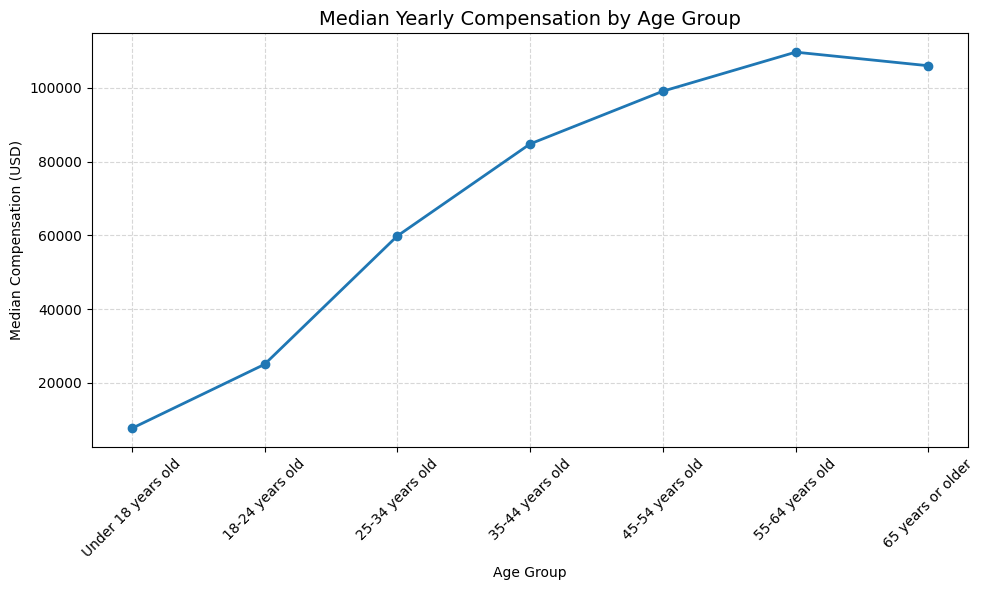

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Filter for non-null age and compensation
df_filtered = df[['Age', 'ConvertedCompYearly']].dropna()

# Define age group order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older']

# Set categorical order for consistent sorting
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Group by age and compute median compensation
median_comp_by_age = df_filtered.groupby('Age')['ConvertedCompYearly'].median().dropna()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age.index, median_comp_by_age.values, marker='o', linestyle='-', linewidth=2)

# Formatting
plt.title('Median Yearly Compensation by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


/tmp/ipykernel_626/1033240820.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp = df_25_45.groupby('Age')['ConvertedCompYearly'].median()


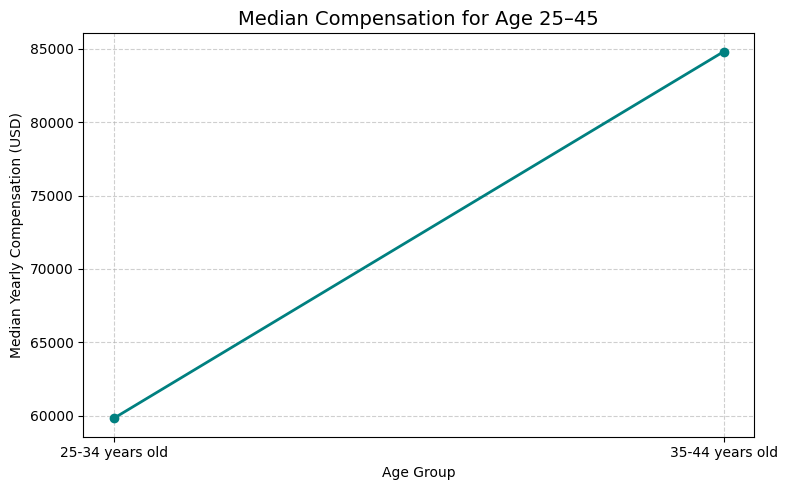

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Define valid age groups to filter: 25 to 45 range
valid_age_groups = ['25-34 years old', '35-44 years old']

# Drop missing compensation or age
df_filtered = df[['Age', 'ConvertedCompYearly']].dropna()

# Set categorical age type to enforce order
df_filtered['Age'] = pd.Categorical(df_filtered['Age'],
                                    categories=['Under 18 years old', '18-24 years old', '25-34 years old',
                                                '35-44 years old', '45-54 years old', '55-64 years old',
                                                '65 years or older'],
                                    ordered=True)

# Filter for selected age range
df_25_45 = df_filtered[df_filtered['Age'].isin(valid_age_groups)]

# Compute median compensation
median_comp = df_25_45.groupby('Age')['ConvertedCompYearly'].median()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(median_comp.index, median_comp.values, marker='o', linewidth=2, color='teal')

# Formatting
plt.title('Median Compensation for Age 25–45', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


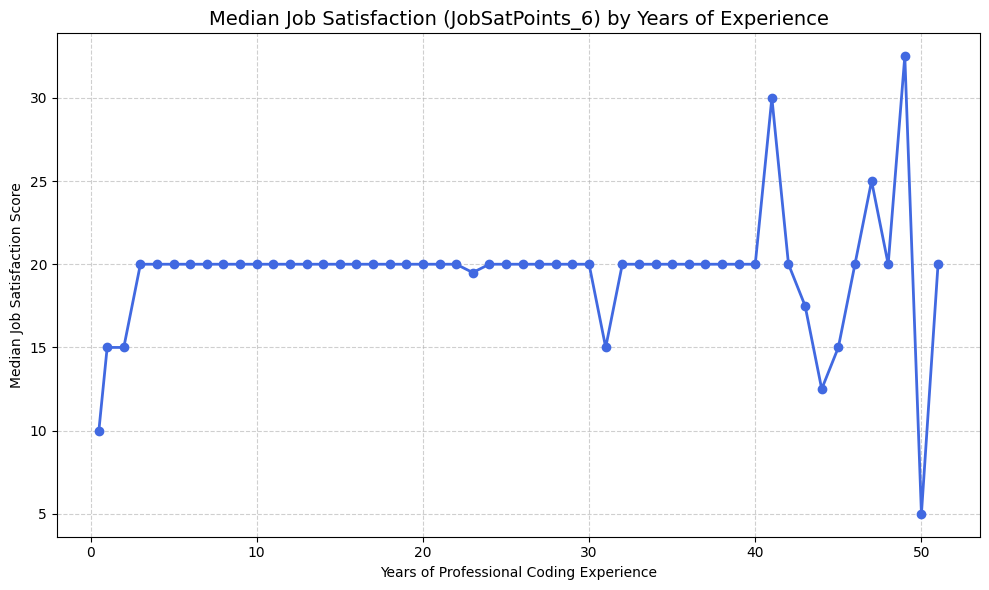

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep only relevant columns and drop missing values
df_experience = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

# Convert 'YearsCodePro' to numeric (handle 'Less than 1 year' and 'More than 50 years')
def convert_experience(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    else:
        try:
            return float(val)
        except:
            return None

df_experience['YearsCodePro'] = df_experience['YearsCodePro'].apply(convert_experience)

# Drop rows with conversion issues
df_experience = df_experience.dropna()

# Group by experience and calculate median satisfaction
grouped = df_experience.groupby('YearsCodePro')['JobSatPoints_6'].median()

# Sort by experience level
grouped = grouped.sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o', color='royalblue', linewidth=2)

# Formatting
plt.title('Median Job Satisfaction (JobSatPoints_6) by Years of Experience', fontsize=14)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


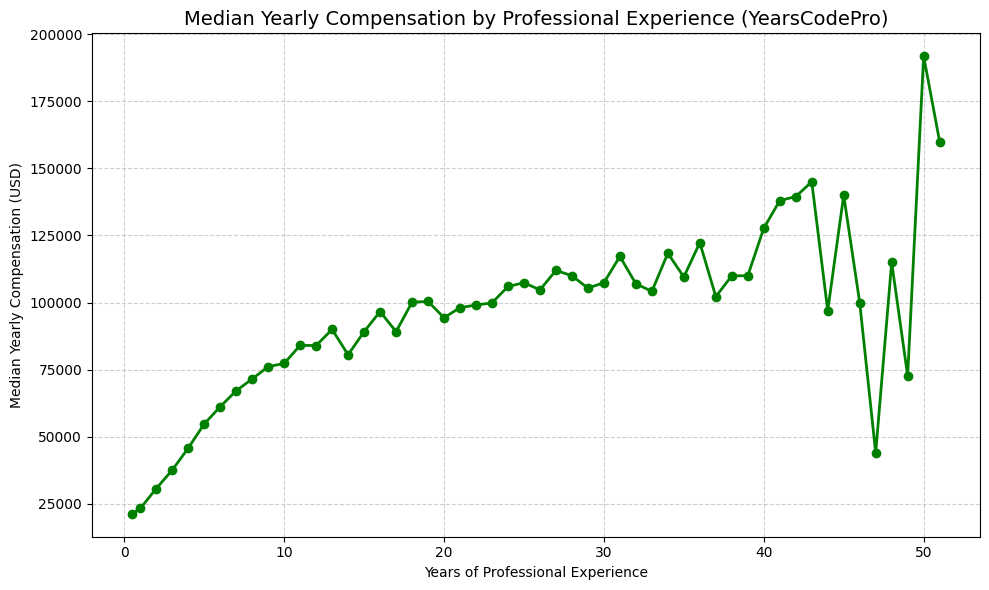

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Select relevant columns and drop missing values
df_comp = df[['YearsCodePro', 'ConvertedCompYearly']].dropna()

# Convert experience column from string to numeric
def convert_experience(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

df_comp['YearsCodePro'] = df_comp['YearsCodePro'].apply(convert_experience)

# Drop rows with conversion issues
df_comp = df_comp.dropna()

# Group by experience and compute median compensation
grouped_comp = df_comp.groupby('YearsCodePro')['ConvertedCompYearly'].median().sort_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_comp.index, grouped_comp.values, marker='o', color='green', linewidth=2)

# Formatting
plt.title('Median Yearly Compensation by Professional Experience (YearsCodePro)', fontsize=14)
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


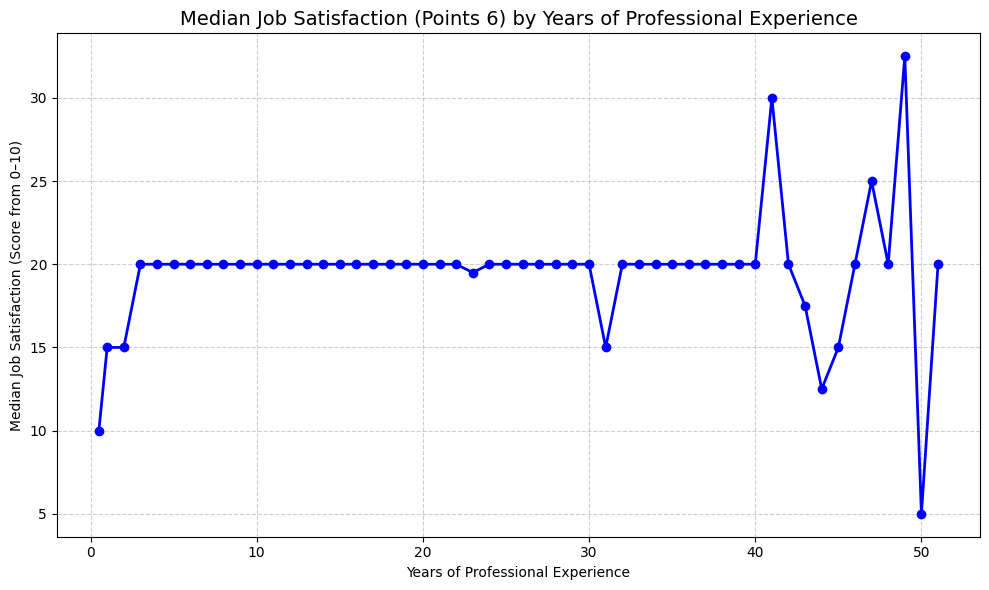

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Select and clean relevant columns
df_sat = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

# Convert experience from string to float
def convert_experience(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

df_sat['YearsCodePro'] = df_sat['YearsCodePro'].apply(convert_experience)
df_sat = df_sat.dropna()

# Group by experience and calculate median job satisfaction
grouped_sat = df_sat.groupby('YearsCodePro')['JobSatPoints_6'].median().sort_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_sat.index, grouped_sat.values, marker='o', color='blue', linewidth=2)

# Formatting
plt.title('Median Job Satisfaction (Points 6) by Years of Professional Experience', fontsize=14)
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Job Satisfaction (Score from 0–10)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
